In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

C:\Users\shail\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})

In [3]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
plt.rcParams.update({'font.size': 18})

# QUESTION1. Read the data as an appropriate Time Series data and plot the data.
#### 2

In [4]:
rose=pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
print('\n')
print('First 12 observations of the Data set on Rose wine')
display(rose.head(12))
print('\n')
print('Last 14 observations of the Data set on Rose wine','\n')
display(rose.tail(14))



First 12 observations of the Data set on Rose wine


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
1980-06-01,168.0
1980-07-01,118.0
1980-08-01,129.0
1980-09-01,205.0




Last 14 observations of the Data set on Rose wine 



,Rose
YearMonth,
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0
1994-10-01,51.0
1994-11-01,63.0
1994-12-01,84.0
1995-01-01,30.0
1995-02-01,39.0


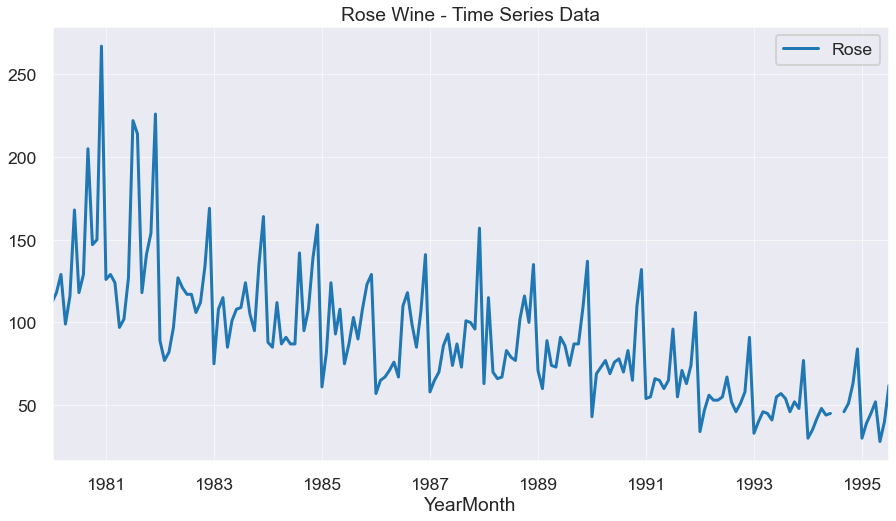

In [5]:
rose.plot(grid=True);
plt.title('Rose Wine - Time Series Data');

# QUESTION2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
#### 5

In [6]:
display(rose.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


None

In [7]:
display(rose.dtypes)

Rose    float64
dtype: object

In [8]:
display(rose.isnull().sum())

Rose    2
dtype: int64

#### There are 2 missing values in Rose data set . We note that 1994 - July and Aug Data set is missing. We will need to impute the same. We shall interpolate.

In [9]:
rose=rose.interpolate()
display(rose.tail(14).round(2)) # 1994 July and Aug values are no longer NaN
rose.isnull().sum()

,Rose
YearMonth,
1994-06-01,45.00
1994-07-01,45.33
1994-08-01,45.67
1994-09-01,46.00
1994-10-01,51.00
1994-11-01,63.00
1994-12-01,84.00
1995-01-01,30.00
1995-02-01,39.00


Rose    0
dtype: int64

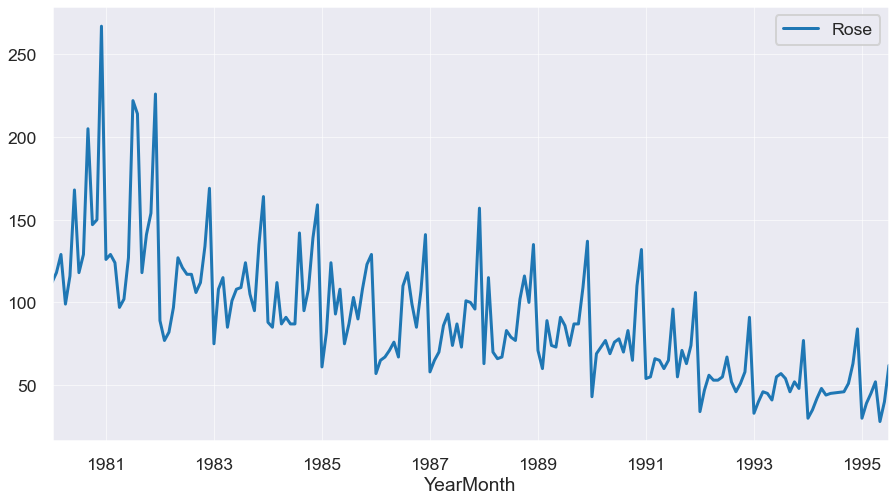

In [10]:
rose.plot(grid=True);

In [11]:
display(rose.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
Rose,187.0,89.91,39.24,28.0,62.5,85.0,111.0,267.0


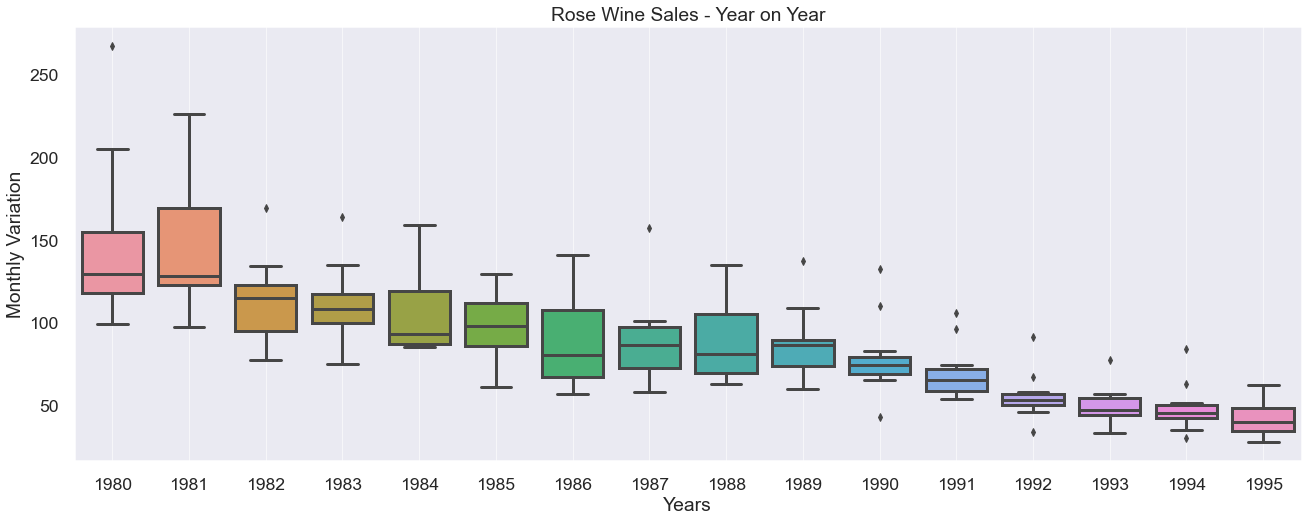

In [12]:
#### Plot Box plot for year on year Wine Sales
rose_series=pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth',squeeze=True)
fig , ax = plt.subplots(figsize=(22,8))
sns.boxplot(rose_series.index.year,rose_series,ax=ax); 
plt.grid();
plt.title('Rose Wine Sales - Year on Year')
plt.xlabel('Years');
plt.ylabel('Monthly Variation');


### Monthly Sales for all the years

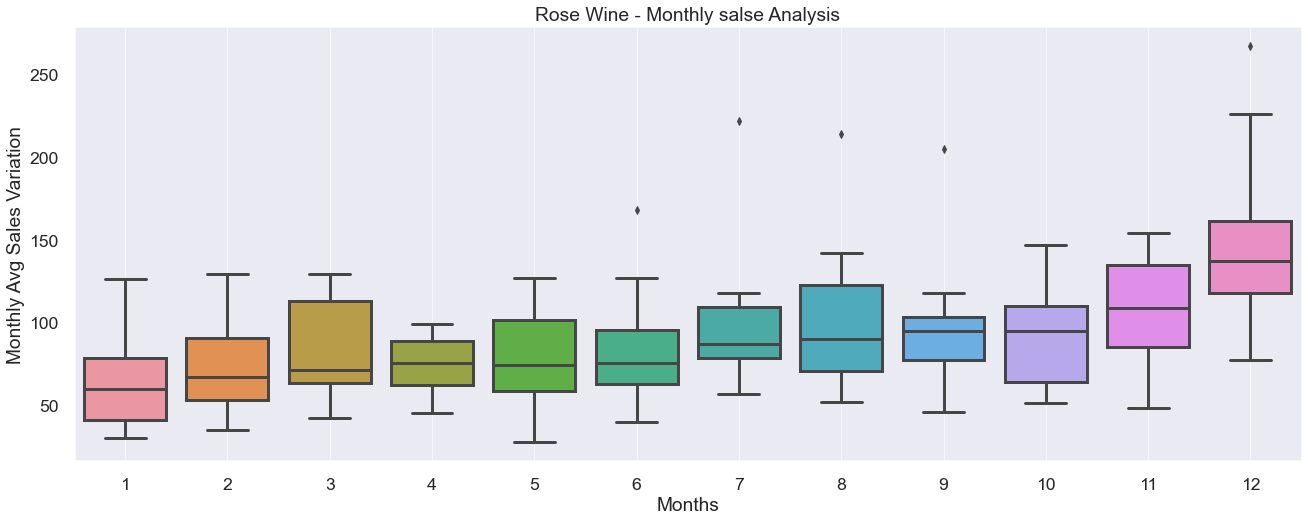

In [13]:
fig , ax = plt.subplots(figsize=(22,8))
sns.boxplot(rose_series.index.month,rose_series,ax=ax); # rose_series is a series and not a dataframe
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Avg Sales Variation');
plt.title('Rose Wine - Monthly salse Analysis');



### Month Plot for Wine Sales

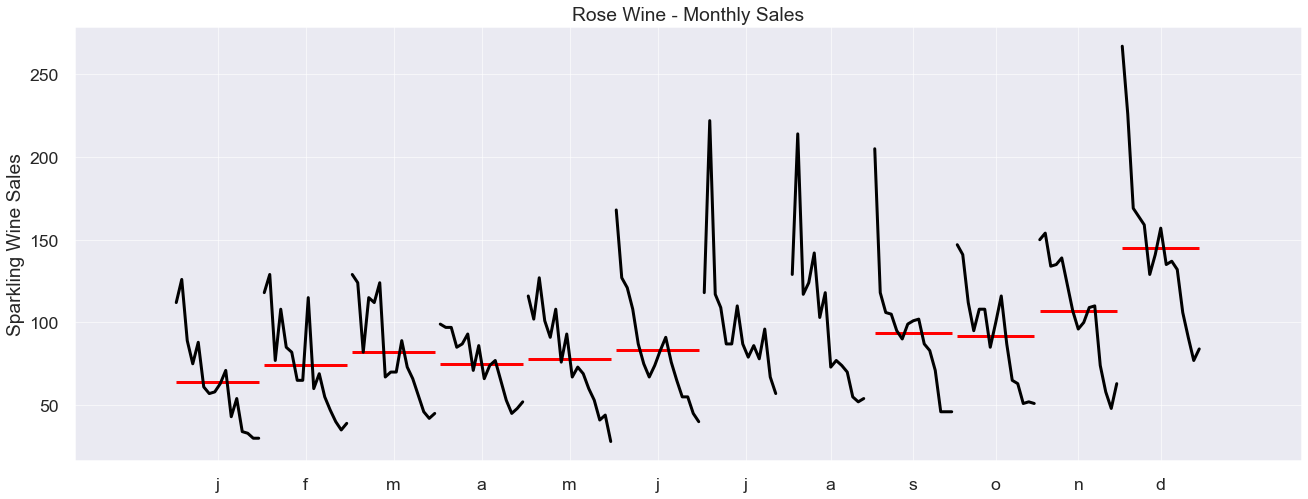

In [14]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax= plt.subplots(figsize=(22,8))
month_plot(rose_series,ylabel='Sparkling Wine Sales',ax=ax);

plt.title("Rose Wine - Monthly Sales");

### Monthly Sales Year wise

In [15]:
rose_yearly_sales_across_months=pd.pivot_table(data=rose,
                                          index=rose.index.year,
                                          columns=rose.index.month,
                                          values='Rose',
                                              aggfunc='mean')
print('\n')
print('Rose Wine - Year on Year monthly sales','\n')
display(round(rose_yearly_sales_across_months,0))



Rose Wine - Year on Year monthly sales 



YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


In [16]:
rose_yearly_sales_across_months=pd.pivot_table(data=rose,
#                                          index=rose.index.year,
                                          columns=rose.index.month,
                                          values='Rose',
                                              aggfunc='mean').T
print('\n')
print('Rose Wine - Year on Year monthly sales','\n')
display(round(rose_yearly_sales_across_months,0))



Rose Wine - Year on Year monthly sales 



,Rose
YearMonth,
1,64.0
2,74.0
3,82.0
4,75.0
5,78.0
6,84.0
7,94.0
8,97.0
9,93.0


In [17]:
rose_yearly_sales_across_months=pd.pivot_table(data=rose,
                                          index=rose.index.year,
                                          columns=rose.index.month,
                                          values='Rose',
                                          aggfunc='mean')
                                                
                                                   
print('\n')
print('Rose Wine - Year on Year monthly sales','\n')
display(round(rose_yearly_sales_across_months,0))



Rose Wine - Year on Year monthly sales 



YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


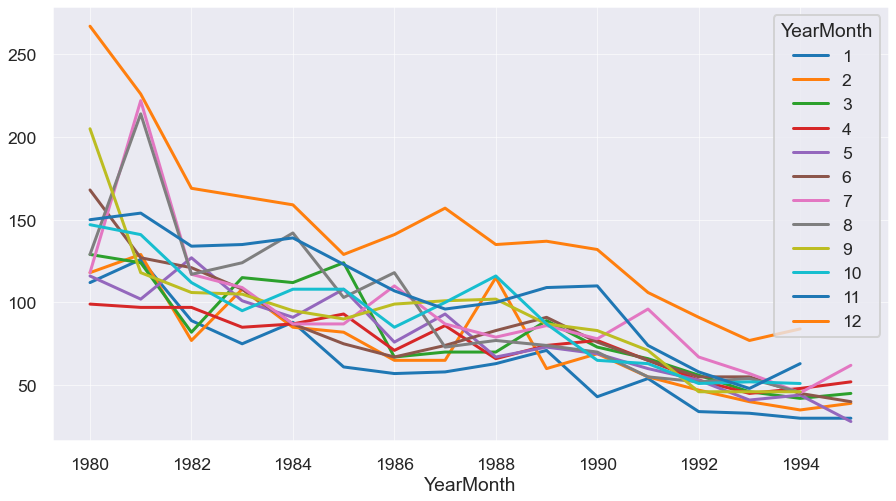

In [18]:
rose_yearly_sales_across_months.plot();

### Read the data year wise - sum of all monthly sales

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0
1985-12-31,1183.0
1986-12-31,1063.0
1987-12-31,1060.0
1988-12-31,1073.0


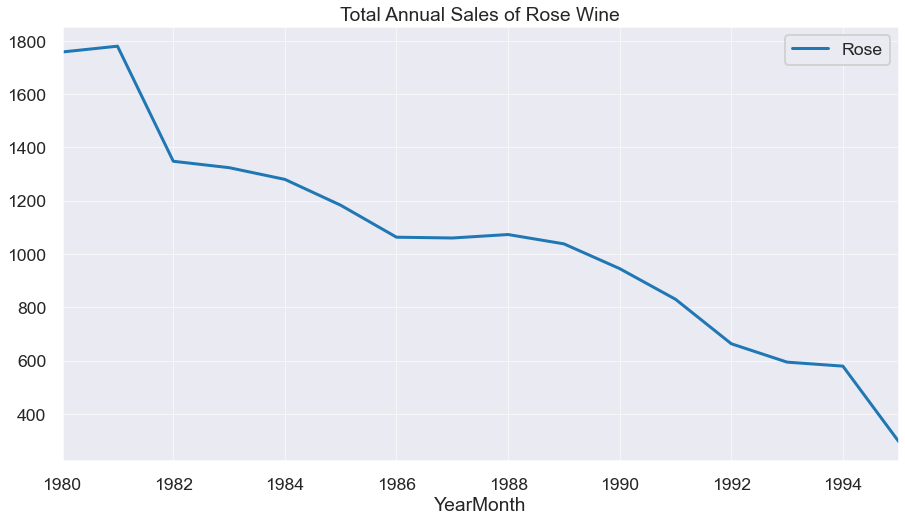

In [19]:
rose_yearly_sum=rose.resample('A').sum()
display(rose_yearly_sum)
rose_yearly_sum.plot();
plt.title('Total Annual Sales of Rose Wine');

### Read the data year wise - mean of all monthly sales

,Rose
YearMonth,
1980-12-31,146.0
1981-12-31,148.0
1982-12-31,112.0
1983-12-31,110.0
1984-12-31,107.0
1985-12-31,99.0
1986-12-31,89.0
1987-12-31,88.0
1988-12-31,89.0


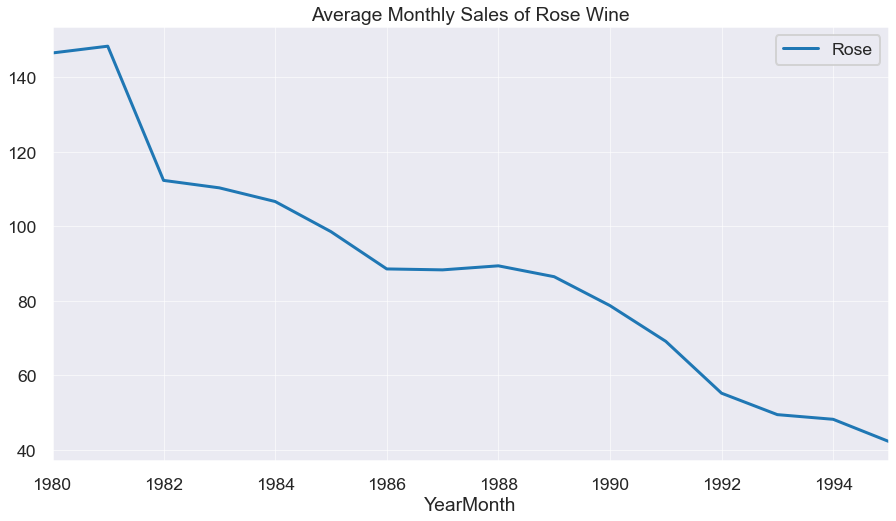

In [20]:
rose_yearly_sum=rose.resample('A').mean()
display(round(rose_yearly_sum,0))
rose_yearly_sum.plot();
plt.title('Average Monthly Sales of Rose Wine');

<AxesSubplot:xlabel='YearMonth'>

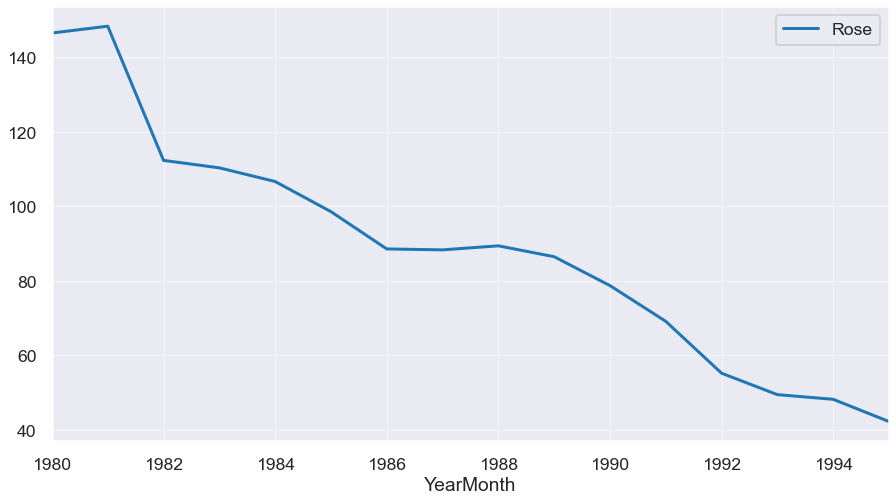

In [21]:
rose_yearly_sum.plot()

### Decompose the data

### ADDITIVE MODEL

'Rose Wine -Decomposition of Sales Data - Additive Model'

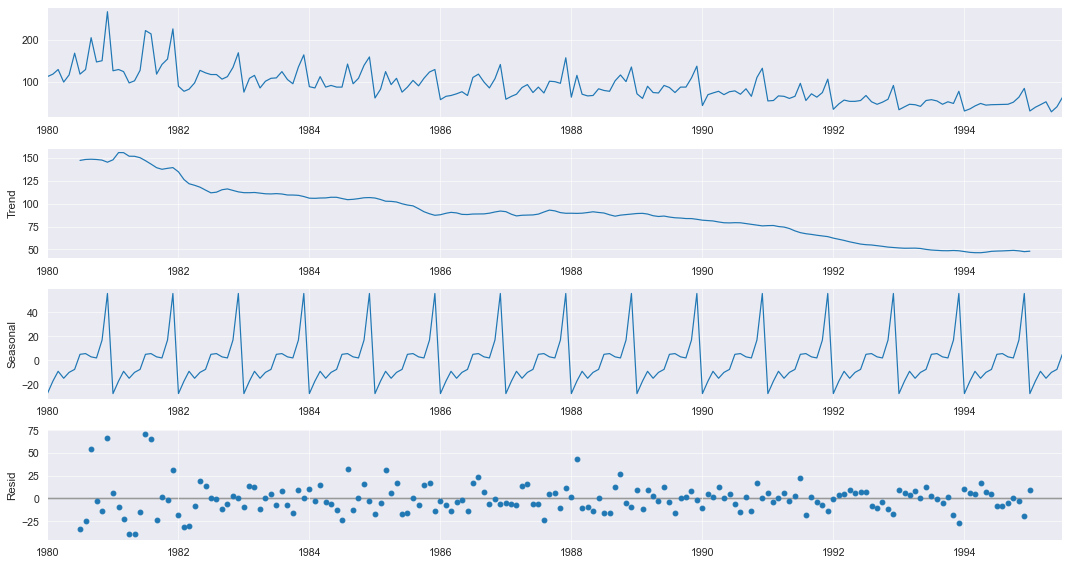

In [22]:
sns.set_context("paper", font_scale = 1.2, rc={"grid.linewidth": 0.6})
rose_additive_decomposition=seasonal_decompose(rose,model='additive')
rose_additive_decomposition.plot();
display('Rose Wine -Decomposition of Sales Data - Additive Model')

#### MULTIPLICATIVE Model

'Rose Wine -Decomposition of Sales Data - Multiplicative Model'

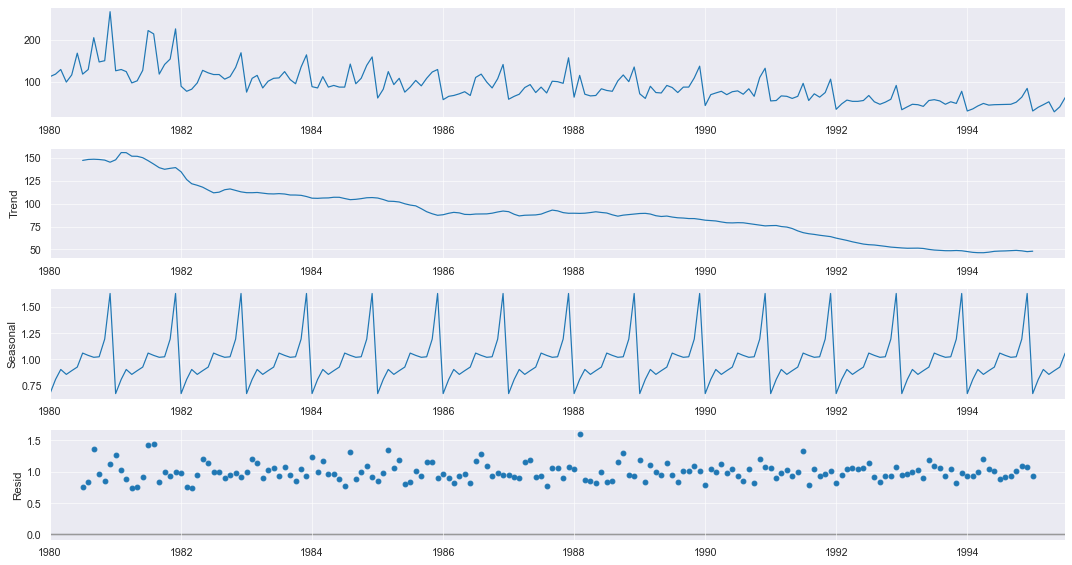

In [23]:
rose_additive_decomposition=seasonal_decompose(rose,model='mult')
rose_additive_decomposition.plot();
display('Rose Wine -Decomposition of Sales Data - Multiplicative Model')    

# QUESTION3. Split the data into training and test. The test data should start in 1991.
#### 2

In [24]:
ROSE_train=rose[rose.index<'1991']
ROSE_test=rose[rose.index>='1991']  

In [25]:
print('First 12 observations of Rose Sales Train Data')
display(ROSE_train.head(12))
print('Last 12 observations of Rose Sales Train Data')
display(ROSE_train.tail(12)) 
print('Nummber of Observations in Train Set:', ROSE_train.shape[0])

First 12 observations of Rose Sales Train Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
1980-06-01,168.0
1980-07-01,118.0
1980-08-01,129.0
1980-09-01,205.0


Last 12 observations of Rose Sales Train Data


,Rose
YearMonth,
1990-01-01,43.0
1990-02-01,69.0
1990-03-01,73.0
1990-04-01,77.0
1990-05-01,69.0
1990-06-01,76.0
1990-07-01,78.0
1990-08-01,70.0
1990-09-01,83.0


Nummber of Observations in Train Set: 132


In [26]:
print('First 12 observations of Rose Sales Test Data')
display(ROSE_test.head(12))
print('Last 12 observations of Rose Sales Test Data')
display(round(ROSE_test.tail(12),0)) 
print('Nummber of Observations in Test Set:', ROSE_test.shape[0])

First 12 observations of Rose Sales Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0
1991-06-01,65.0
1991-07-01,96.0
1991-08-01,55.0
1991-09-01,71.0


Last 12 observations of Rose Sales Test Data


,Rose
YearMonth,
1994-08-01,46.0
1994-09-01,46.0
1994-10-01,51.0
1994-11-01,63.0
1994-12-01,84.0
1995-01-01,30.0
1995-02-01,39.0
1995-03-01,45.0
1995-04-01,52.0


Nummber of Observations in Test Set: 55


### Plot the Train and Test Data

In [27]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})

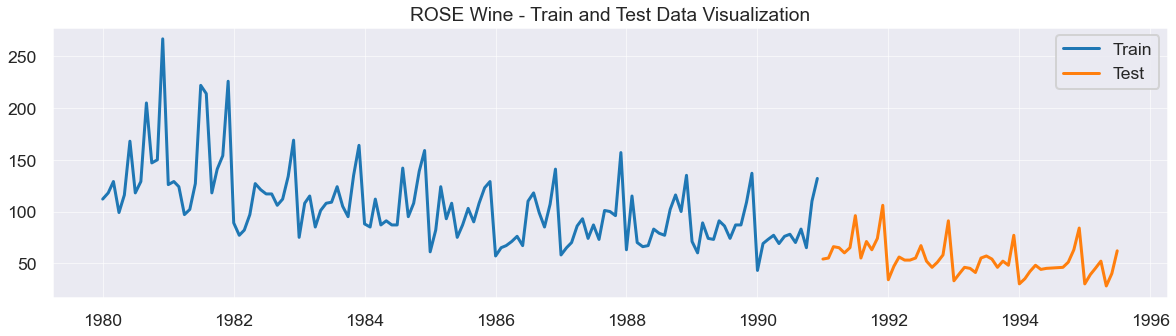

In [28]:
plt.figure(figsize=(20,5))
plt.plot(ROSE_train,label='Train');
plt.plot(ROSE_test,label='Test');
plt.legend()
plt.title('ROSE Wine - Train and Test Data Visualization');  

# QUESTION4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.
#### 16

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
# define function for Mean Average Percent Error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


ROSE Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

ROSE Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187] 



YearMonth
1991-01-01    72.063266
1991-02-01    71.568888
1991-03-01    71.074511
1991-04-01    70.580133
1991-05-01    70.085755
Name: RegOnTime, dtype: float64

,ROSE_TEST RMSE,ROSE_MAPE
Linear Regression Model,15.269,24.952


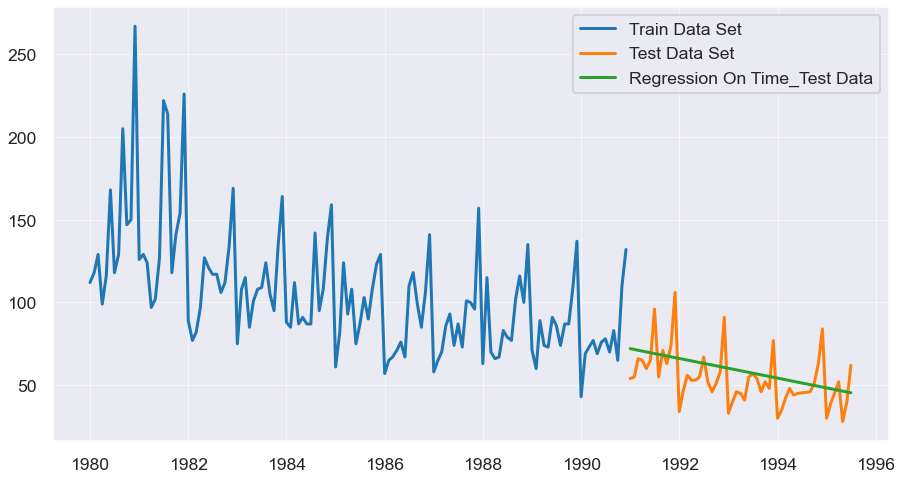

In [32]:
ROSE_train_time = [i+1 for i in range(len(ROSE_train))]
ROSE_test_time = [i+133 for i in range(len(ROSE_test))]
print('ROSE Training Time instance','\n',ROSE_train_time,'\n')
print('ROSE Test Time instance','\n',ROSE_test_time,'\n')

LinearRegression_train_ROSE = ROSE_train.copy()
LinearRegression_test_ROSE = ROSE_test.copy()
LinearRegression_train_ROSE['time']=ROSE_train_time
LinearRegression_test_ROSE['time']=ROSE_test_time

lr.fit(LinearRegression_train_ROSE[['time']],
       LinearRegression_train_ROSE['Rose'])

test_predictions_model1         = lr.predict(LinearRegression_test_ROSE[['time']])
LinearRegression_test_ROSE['RegOnTime'] = test_predictions_model1
display(LinearRegression_test_ROSE['RegOnTime'].head())

plt.plot(ROSE_train,label='Train Data Set');
plt.plot(ROSE_test,label='Test Data Set');
plt.plot(LinearRegression_test_ROSE['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
a=np.asarray(ROSE_test['Rose'])
b=np.asarray(LinearRegression_test_ROSE['RegOnTime'])
MAPE=mean_absolute_percentage_error(a,b)
RMSE=mean_squared_error(a,b,squared=False)
RMSE_LinearRegression_Reg_ROSE =pd.DataFrame({'ROSE_TEST RMSE':round(RMSE,3),
                                   'ROSE_MAPE':round(MAPE,3)},
                                  index=['Linear Regression Model'])
RMSE_LinearRegression_Reg_ROSE


## Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 ¶

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

,ROSE_TEST RMSE,ROSE_MAPE
Naive Regression Model,79.719,164.846


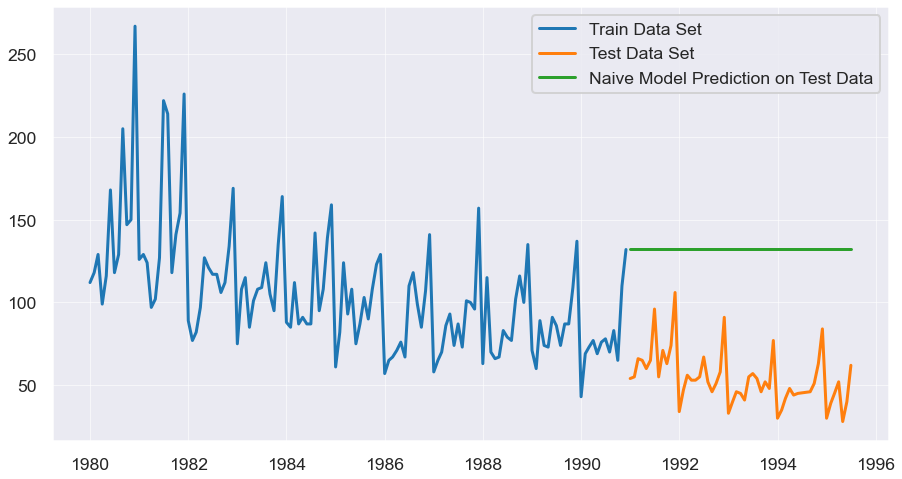

In [33]:
NaiveModel_train = ROSE_train.copy()
NaiveModel_test = ROSE_test.copy()
NaiveModel_test['naive'] = np.asarray(ROSE_train['Rose'])[len(np.asarray(ROSE_train['Rose']))-1]
display(NaiveModel_test['naive'].head())
plt.plot(ROSE_train,label='Train Data Set');
plt.plot(ROSE_test,label='Test Data Set');
plt.plot(NaiveModel_test['naive'], label='Naive Model Prediction on Test Data')

plt.legend(loc='best')
b=np.asarray(NaiveModel_test[['naive']])
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_Naive_Reg_ROSE=pd.DataFrame({'ROSE_TEST RMSE':RMSE,
                                   'ROSE_MAPE':MAPE},
                                  index=['Naive Regression Model'])
RMSE_Naive_Reg_ROSE  


In [34]:
Result=pd.concat([RMSE_LinearRegression_Reg_ROSE,RMSE_Naive_Reg_ROSE])
Result

,ROSE_TEST RMSE,ROSE_MAPE
Linear Regression Model,15.269,24.952
Naive Regression Model,79.719,164.846


###  Simple Average Method

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


,ROSE_TEST RMSE,ROSE_MAPE
SIMPLE AVG Model,53.461,110.588


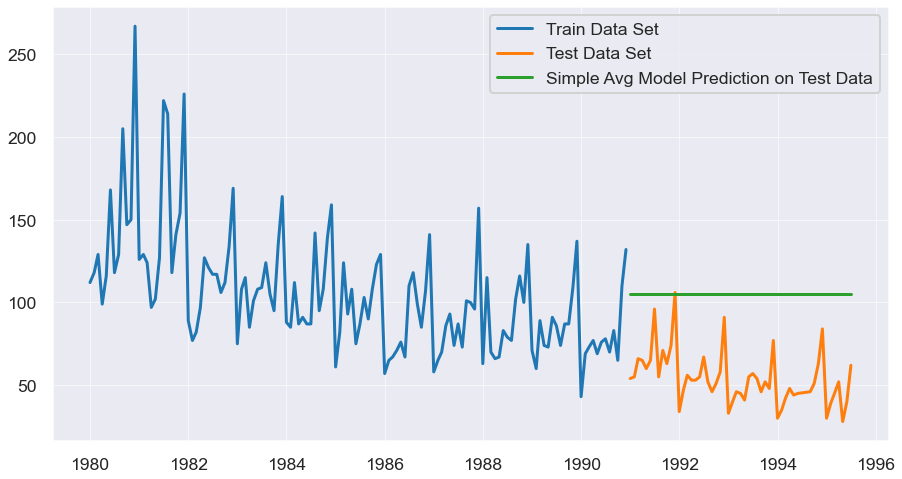

In [35]:
SimpleAvgModel_train = ROSE_train.copy()
SimpleAvgModel_test = ROSE_test.copy()
SimpleAvgModel_test['mean_forecast'] = ROSE_train['Rose'].mean()
display(SimpleAvgModel_test.head())

plt.plot(ROSE_train,label='Train Data Set');
plt.plot(ROSE_test,label='Test Data Set');
plt.plot(SimpleAvgModel_test['mean_forecast'], label='Simple Avg Model Prediction on Test Data')
plt.legend(loc='best')

b=np.asarray(SimpleAvgModel_test['mean_forecast'])

MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_SimpleAvg_Reg_ROSE =pd.DataFrame({'ROSE_TEST RMSE':RMSE,
                                   'ROSE_MAPE':MAPE},
                                  index=['SIMPLE AVG Model'])
RMSE_SimpleAvg_Reg_ROSE  


In [36]:
Result=pd.concat([Result,RMSE_SimpleAvg_Reg_ROSE])
Result

,ROSE_TEST RMSE,ROSE_MAPE
Linear Regression Model,15.269,24.952
Naive Regression Model,79.719,164.846
SIMPLE AVG Model,53.461,110.588


### Moving Average Method

### Simple Exponential Model

In [37]:
ROSE_test['Rose']

YearMonth
1991-01-01     54.000000
1991-02-01     55.000000
1991-03-01     66.000000
1991-04-01     65.000000
1991-05-01     60.000000
1991-06-01     65.000000
1991-07-01     96.000000
1991-08-01     55.000000
1991-09-01     71.000000
1991-10-01     63.000000
1991-11-01     74.000000
1991-12-01    106.000000
1992-01-01     34.000000
1992-02-01     47.000000
1992-03-01     56.000000
1992-04-01     53.000000
1992-05-01     53.000000
1992-06-01     55.000000
1992-07-01     67.000000
1992-08-01     52.000000
1992-09-01     46.000000
1992-10-01     51.000000
1992-11-01     58.000000
1992-12-01     91.000000
1993-01-01     33.000000
1993-02-01     40.000000
1993-03-01     46.000000
1993-04-01     45.000000
1993-05-01     41.000000
1993-06-01     55.000000
1993-07-01     57.000000
1993-08-01     54.000000
1993-09-01     46.000000
1993-10-01     52.000000
1993-11-01     48.000000
1993-12-01     77.000000
1994-01-01     30.000000
1994-02-01     35.000000
1994-03-01     42.000000
1994-04-01     



SES Model best parameters for ROSE Wine


{'smoothing_level': 0.09874982660106467,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38704806164168,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of ROSE Wine


1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
Freq: MS, dtype: float64

,ROSE_TEST RMSE,ROSE_MAPE
"SES Model, Alpha=0.0987",36.796,75.909


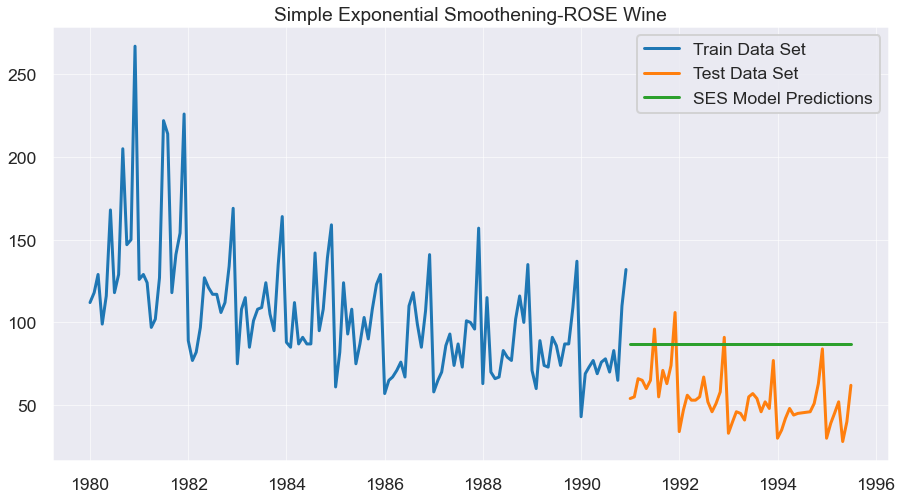

In [38]:
model_SES_ROSE=SimpleExpSmoothing(ROSE_train,initialization_method='estimated')
model_SES_ROSE=model_SES_ROSE.fit(optimized=True)
print('\n')
print('SES Model best parameters for ROSE Wine')
display(model_SES_ROSE.params)
SES_ROSE_predict=model_SES_ROSE.forecast(steps=len(ROSE_test))
print('Predictions for test data of ROSE Wine')
display(SES_ROSE_predict.head())
print('\n')
plt.plot(ROSE_train,label='Train Data Set');
plt.plot(ROSE_test,label='Test Data Set');
plt.plot(SES_ROSE_predict,label='SES Model Predictions');
plt.legend(loc='best');
plt.title('Simple Exponential Smoothening-ROSE Wine');
a=np.asarray(ROSE_test['Rose'])
b=np.asarray(SES_ROSE_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_SES_ROSE=pd.DataFrame({'ROSE_TEST RMSE':RMSE,
                           'ROSE_MAPE':MAPE},
                           index=['SES Model, Alpha=0.0987'])
RMSE_SES_ROSE    


In [39]:
Result=pd.concat([Result,RMSE_SES_ROSE])
Result

,ROSE_TEST RMSE,ROSE_MAPE
Linear Regression Model,15.269,24.952
Naive Regression Model,79.719,164.846
SIMPLE AVG Model,53.461,110.588
"SES Model, Alpha=0.0987",36.796,75.909


### Double Exponentital Smoothening - Holt Model



DES Model best parameters for ROSE Wine


{'smoothing_level': 0.005627395225399259,
 'smoothing_trend': 6.722744943479034e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.53777460719618,
 'initial_trend': -0.4905093549686182,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of ROSE Wine


1991-01-01    72.357791
1991-02-01    71.867286
1991-03-01    71.376780
1991-04-01    70.886275
1991-05-01    70.395769
1991-06-01    69.905264
1991-07-01    69.414758
1991-08-01    68.924253
1991-09-01    68.433748
1991-10-01    67.943242
1991-11-01    67.452737
1991-12-01    66.962231
1992-01-01    66.471726
1992-02-01    65.981220
1992-03-01    65.490715
1992-04-01    65.000209
1992-05-01    64.509704
1992-06-01    64.019199
1992-07-01    63.528693
1992-08-01    63.038188
1992-09-01    62.547682
1992-10-01    62.057177
1992-11-01    61.566671
1992-12-01    61.076166
1993-01-01    60.585661
1993-02-01    60.095155
1993-03-01    59.604650
1993-04-01    59.114144
1993-05-01    58.623639
1993-06-01    58.133133
1993-07-01    57.642628
1993-08-01    57.152122
1993-09-01    56.661617
1993-10-01    56.171112
1993-11-01    55.680606
1993-12-01    55.190101
1994-01-01    54.699595
1994-02-01    54.209090
1994-03-01    53.718584
1994-04-01    53.228079
1994-05-01    52.737574
1994-06-01    52

,ROSE_TEST RMSE,ROSE_MAPE
"DES Model,Alpha=1.91e-08,Beta=7.30e-09",15.395,25.511


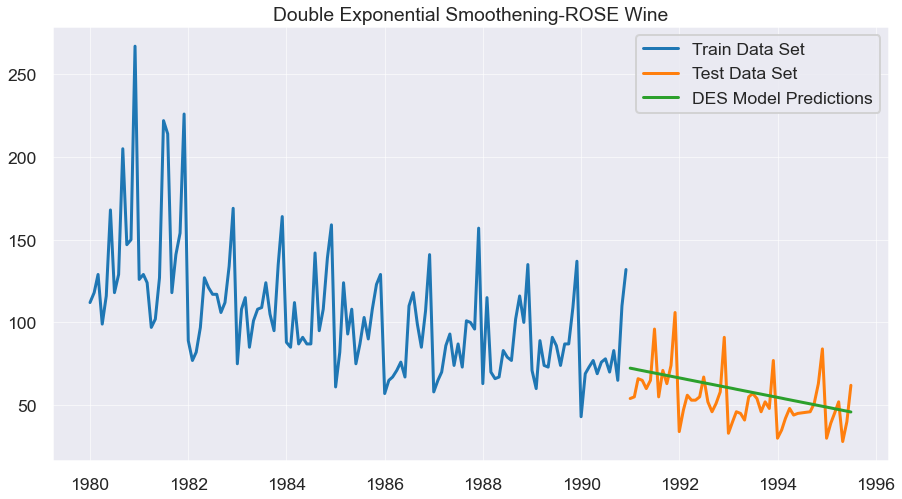

In [40]:
model_DES_ROSE=Holt(ROSE_train,initialization_method='estimated')
model_DES_ROSE=model_DES_ROSE.fit(optimized=True)
print('\n')
print('DES Model best parameters for ROSE Wine')
display(model_DES_ROSE.params)
DES_ROSE_predict=model_DES_ROSE.forecast(steps=len(ROSE_test))
print('Predictions for test data of ROSE Wine')
display(DES_ROSE_predict)
print('\n')
plt.plot(ROSE_train,label='Train Data Set');
plt.plot(ROSE_test,label='Test Data Set');
plt.plot(DES_ROSE_predict,label='DES Model Predictions');
plt.legend(loc='best');
plt.title('Double Exponential Smoothening-ROSE Wine');
b=np.asarray(DES_ROSE_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_DES_ROSE=pd.DataFrame({'ROSE_TEST RMSE':RMSE,
                           'ROSE_MAPE':MAPE},
                           index=['DES Model,Alpha=1.91e-08,Beta=7.30e-09'])
RMSE_DES_ROSE    


In [41]:
Result=pd.concat([Result,RMSE_DES_ROSE])
Result

,ROSE_TEST RMSE,ROSE_MAPE
Linear Regression Model,15.269,24.952
Naive Regression Model,79.719,164.846
SIMPLE AVG Model,53.461,110.588
"SES Model, Alpha=0.0987",36.796,75.909
"DES Model,Alpha=1.91e-08,Beta=7.30e-09",15.395,25.511


### Holt Winters Model ( with sesonality and trend ,additive)



TES_ADD Model best parameters for ROSE Wine


{'smoothing_level': 0.09247995167383646,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 147.1251209143706,
 'initial_trend': -0.5503329642408892,
 'initial_seasons': array([-31.99085126, -19.51359677, -11.31406667, -21.57574971,
        -12.21264592,  -6.5948571 ,   3.15000859,   8.96777153,
          4.77567092,   3.09390942,  21.52051931,  63.56076615]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of ROSE Wine


1991-01-01    41.703704
1991-02-01    53.630626
1991-03-01    61.279823
1991-04-01    50.467807
1991-05-01    59.280578
Freq: MS, dtype: float64

,ROSE_TEST RMSE,ROSE_MAPE
"TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455",14.381,18.954


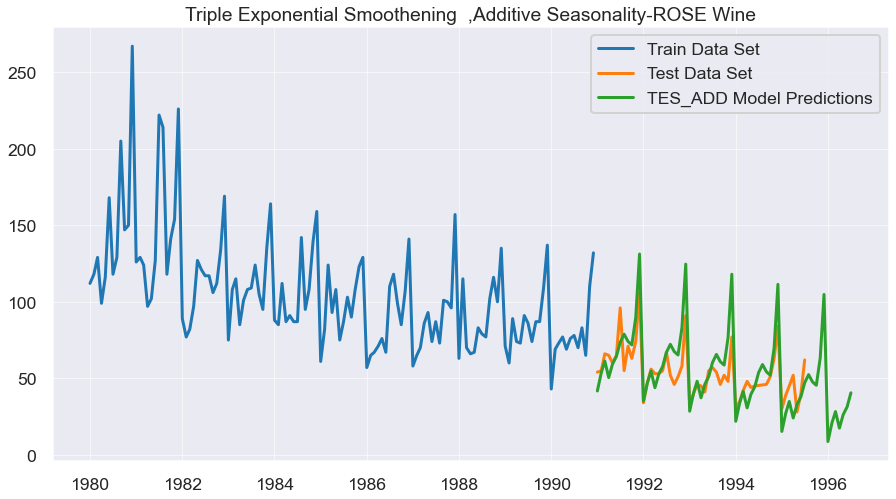

In [42]:
model_TES_ADD_ROSE=ExponentialSmoothing(ROSE_train,initialization_method='estimated',seasonal='add',trend='add')
model_TES_ADD_ROSE=model_TES_ADD_ROSE.fit(optimized=True)
print('\n')
print('TES_ADD Model best parameters for ROSE Wine')
display(model_TES_ADD_ROSE.params)
TES_ADD_ROSE_predict_1yrahead=model_TES_ADD_ROSE.forecast(steps=len(ROSE_test)+12)
TES_ADD_ROSE_predict=model_TES_ADD_ROSE.forecast(steps=len(ROSE_test))
print('Predictions for test data of ROSE Wine')
display(TES_ADD_ROSE_predict.head())
print('\n')
plt.plot(ROSE_train,label='Train Data Set');
plt.plot(ROSE_test,label='Test Data Set');
plt.plot(TES_ADD_ROSE_predict_1yrahead,label='TES_ADD Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening  ,Additive Seasonality-ROSE Wine');

b=np.asarray(TES_ADD_ROSE_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_TES_ADD_ROSE=pd.DataFrame({'ROSE_TEST RMSE':RMSE,
                               'ROSE_MAPE':MAPE},
                               index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
RMSE_TES_ADD_ROSE       


In [43]:
a_train=np.asarray(ROSE_train['Rose'])
a_train

array([112., 118., 129.,  99., 116., 168., 118., 129., 205., 147., 150.,
       267., 126., 129., 124.,  97., 102., 127., 222., 214., 118., 141.,
       154., 226.,  89.,  77.,  82.,  97., 127., 121., 117., 117., 106.,
       112., 134., 169.,  75., 108., 115.,  85., 101., 108., 109., 124.,
       105.,  95., 135., 164.,  88.,  85., 112.,  87.,  91.,  87.,  87.,
       142.,  95., 108., 139., 159.,  61.,  82., 124.,  93., 108.,  75.,
        87., 103.,  90., 108., 123., 129.,  57.,  65.,  67.,  71.,  76.,
        67., 110., 118.,  99.,  85., 107., 141.,  58.,  65.,  70.,  86.,
        93.,  74.,  87.,  73., 101., 100.,  96., 157.,  63., 115.,  70.,
        66.,  67.,  83.,  79.,  77., 102., 116., 100., 135.,  71.,  60.,
        89.,  74.,  73.,  91.,  86.,  74.,  87.,  87., 109., 137.,  43.,
        69.,  73.,  77.,  69.,  76.,  78.,  70.,  83.,  65., 110., 132.])

In [44]:
TES_ADD_ROSE_predict_train=model_TES_ADD_ROSE.predict(start=0,end=(len(ROSE_train)-1))
TES_ADD_ROSE_predict_train
b_train=np.asarray(TES_ADD_ROSE_predict_train)
b_train

array([114.58393669, 126.27189588, 133.15610848, 121.95973576,
       128.64919134, 132.54685059, 145.02008886, 147.78870233,
       141.30869047, 144.96676523, 163.03107561, 203.31587624,
       113.10343055, 126.2230262 , 134.12903774, 122.38028881,
       128.84589176, 131.43064084, 140.21542812, 153.04629135,
       153.94085381, 148.38495091, 165.57826794, 205.99742415,
       111.74531102, 121.56874729, 125.09622883, 110.29867566,
       117.88158561, 123.79231198, 132.72861184, 136.54146055,
       129.99183365, 125.54097556, 142.16498373, 182.8998003 ,
        85.51239706,  96.46713262, 105.18288877,  95.27875874,
       103.14095046, 108.01041131, 117.20398121, 121.7127074 ,
       117.18180253, 113.82313555, 129.95864982, 171.91478751,
        75.08087797,  88.20255928,  95.55558388,  86.26434669,
        95.1451507 ,  99.82926321, 107.8373463 , 111.1777395 ,
       109.28574709, 105.73250742, 123.81848195, 166.71238188,
        69.8971908 ,  81.00130056,  88.74285736,  81.19

In [45]:
RMSE_Train=mean_squared_error(a_train,b_train,squared=False)
RMSE_Train

19.481545125489415

In [46]:
MAPE_Train=mean_absolute_percentage_error(a_train,b_train)
MAPE_Train

13.094053147787108

In [47]:
Result=pd.concat([Result,RMSE_TES_ADD_ROSE])
Result

,ROSE_TEST RMSE,ROSE_MAPE
Linear Regression Model,15.269,24.952
Naive Regression Model,79.719,164.846
SIMPLE AVG Model,53.461,110.588
"SES Model, Alpha=0.0987",36.796,75.909
"DES Model,Alpha=1.91e-08,Beta=7.30e-09",15.395,25.511
"TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455",14.381,18.954


### Holt Winters Model ( with sesonality and trend ,multiplicative seasonality)



TES_MULT Model best parameters for ROSE Wine


{'smoothing_level': 0.07336915185646381,
 'smoothing_trend': 0.04366616789722176,
 'smoothing_seasonal': 8.092476708185191e-05,
 'damping_trend': nan,
 'initial_level': 142.12276158556045,
 'initial_trend': -0.8409491641808673,
 'initial_seasons': array([0.79010014, 0.89594527, 0.9795284 , 0.85607407, 0.9627955 ,
        1.04820922, 1.15284393, 1.22759891, 1.16104173, 1.13748454,
        1.32592572, 1.82801267]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Predictions for test data of ROSE Wine


1991-01-01    56.217768
1991-02-01    63.543963
1991-03-01    69.244346
1991-04-01    60.320222
1991-05-01    67.614328
Freq: MS, dtype: float64

,ROSE_TEST RMSE,ROSE_MAPE
"TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gamma = 8.3567e-07",19.867,36.549


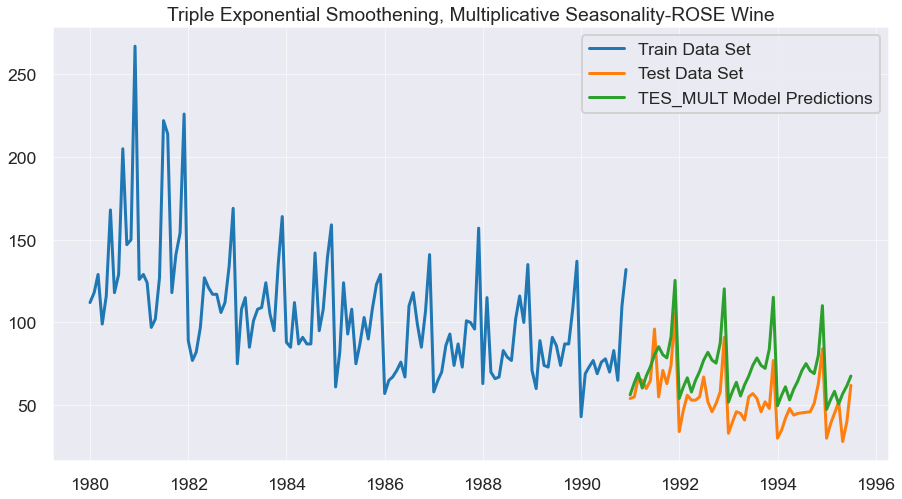

In [48]:
model_TES_MULT_ROSE=ExponentialSmoothing(ROSE_train,initialization_method='estimated',seasonal='mul',trend='add')
model_TES_MULT_ROSE=model_TES_MULT_ROSE.fit(optimized=True)
print('\n')
print('TES_MULT Model best parameters for ROSE Wine')
display(model_TES_MULT_ROSE.params)
TES_MULT_ROSE_predict=model_TES_MULT_ROSE.forecast(steps=len(ROSE_test))
print('Predictions for test data of ROSE Wine')
display(TES_MULT_ROSE_predict.head())
print('\n')
plt.plot(ROSE_train,label='Train Data Set');
plt.plot(ROSE_test,label='Test Data Set');
plt.plot(TES_MULT_ROSE_predict,label='TES_MULT Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening, Multiplicative Seasonality-ROSE Wine');

b=np.asarray(TES_MULT_ROSE_predict)
MAPE=mean_absolute_percentage_error(a,b).round(3)
RMSE=mean_squared_error(a,b,squared=False).round(3)
RMSE_TES_MULT_ROSE=pd.DataFrame({'ROSE_TEST RMSE':RMSE,
                                'ROSE_MAPE':MAPE},
                                index=['TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gamma = 8.3567e-07'])
RMSE_TES_MULT_ROSE        


In [49]:
Result=pd.concat([Result,RMSE_TES_MULT_ROSE])
Result

,ROSE_TEST RMSE,ROSE_MAPE
Linear Regression Model,15.269,24.952
Naive Regression Model,79.719,164.846
SIMPLE AVG Model,53.461,110.588
"SES Model, Alpha=0.0987",36.796,75.909
"DES Model,Alpha=1.91e-08,Beta=7.30e-09",15.395,25.511
"TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455",14.381,18.954
"TES_MULT Model,Alpha = 0.0713,Beta = 0.0455,Gamma = 8.3567e-07",19.867,36.549


# QUESTION5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.
3

In [50]:
# Define the function for testing staionarity


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean() #determining the rolling mean 0f 6 months
    rolstd = timeseries.rolling(window=6).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='6 month Rolling Mean')
    std = plt.plot(rolstd, color='orange', label = '6 month Rolling Std Deviation')
   
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

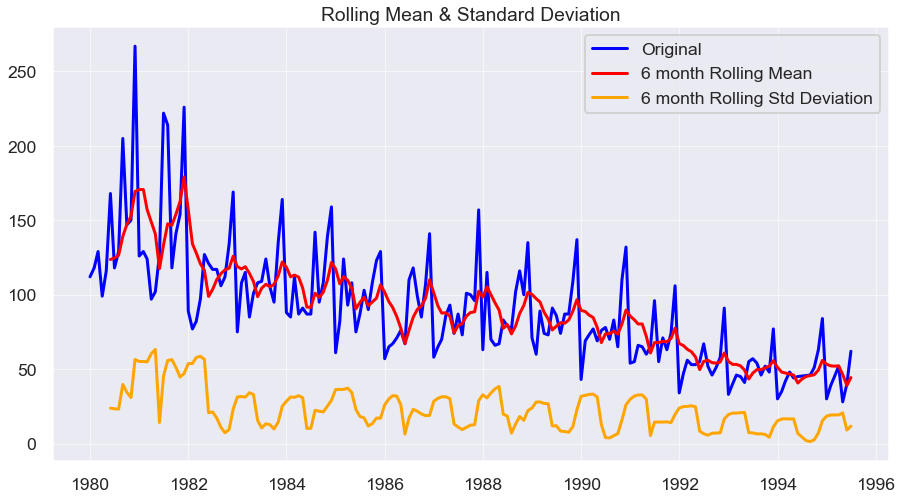

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [51]:
test_stationarity(rose['Rose'])

p-value is more than 0.05, therefore the data is not stationary

Try to make the series stationary by one level of differnecing

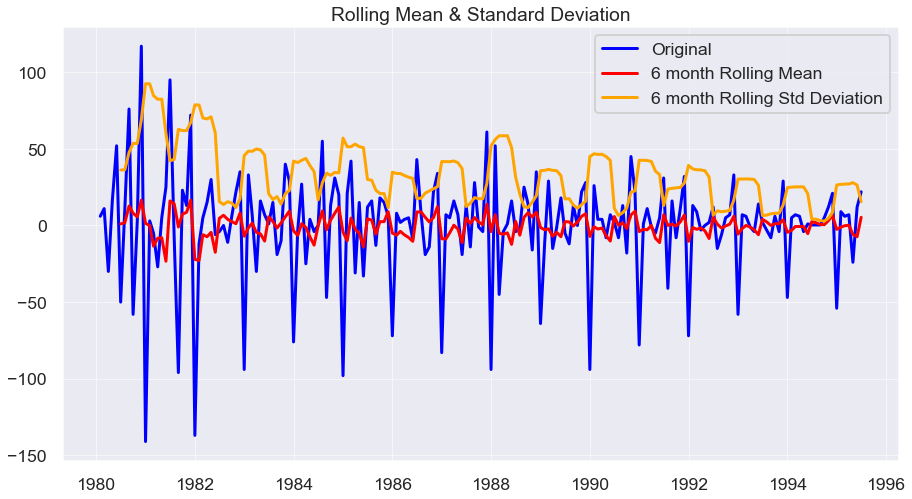

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [52]:
test_stationarity(rose['Rose'].diff().dropna())

Data is now stationary

# QUESTION6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
#### 8

### ARIMA Model

We shall test the train data set only for Staionarity

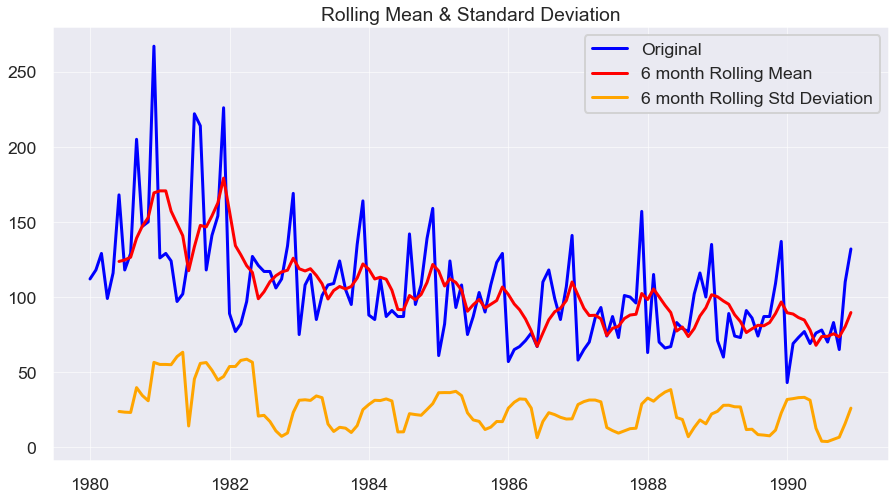

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [53]:
test_stationarity(ROSE_train)

alpha = 0.2194 , is higher than 0.05, so null hypothesis that data is not stationary can not be rejected

do one level of differencing and then check for staionarity again

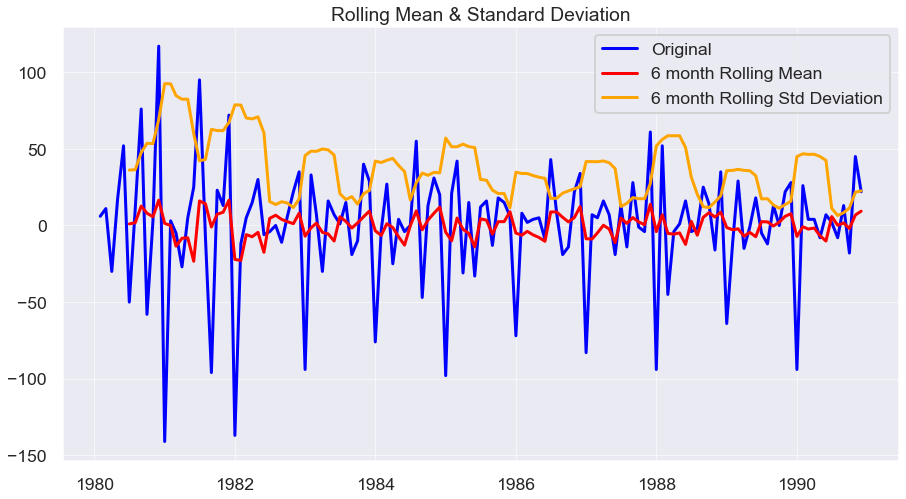

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [54]:
test_stationarity(ROSE_train.diff().dropna())

After one level of differencing , d=1 , data has now become stationary , as the alpha value is less than 0.05.

### Using the AIC method for the Sparkling wine Data Set

In [55]:
df_ROSE=rose.copy()
train_ROSE=ROSE_train.copy()
test_ROSE=ROSE_test.copy()

In [56]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [57]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_ROSE = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_ROSE

,param,AIC


In [58]:
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    ARIMA_model = ARIMA(train_ROSE['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_ROSE = ARIMA_AIC_ROSE.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535788
ARIMA(0, 1, 3) - AIC:1280.5453761734666
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.574229538006
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.8707223309993
ARIMA(2, 1, 0) - AIC:1298.6110341604924
ARIMA(2, 1, 1) - AIC:1281.5078621868527
ARIMA(2, 1, 2) - AIC:1281.8707222264738
ARIMA(2, 1, 3) - AIC:1274.6948366226698
ARIMA(3, 1, 0) - AIC:1297.4810917271693
ARIMA(3, 1, 1) - AIC:1282.4192776271962
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.673067983039


In [59]:
ARIMA_AIC_ROSE.sort_values(by='AIC',ascending=True).round(2).head()

,param,AIC
11,"(2, 1, 3)",1274.69
15,"(3, 1, 3)",1278.67
2,"(0, 1, 2)",1279.67
6,"(1, 1, 2)",1279.87
3,"(0, 1, 3)",1280.55


In [ ]:
auto_ARIMA = ARIMA(train_ROSE, order=(2,1,3))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

In [ ]:
sns.set_context("paper", font_scale = 1.5, rc={"grid.linewidth": 0.6})
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test_ROSE Set using this model and evaluate the model.

In [ ]:
predicted_auto_ARIMA_2yrs = results_auto_ARIMA.forecast(steps=len(test_ROSE)+24)
predicted_auto_ARIMA= results_auto_ARIMA.forecast(steps=len(test_ROSE))
#predicted_auto_ARIMA

In [ ]:
plt.plot(train_ROSE,label='Train');
plt.plot(test_ROSE,label='Test');
plt.title('ROSE Wine - ARIMA model based on least AIC Prediction Visualization');  
plt.plot(predicted_auto_ARIMA_2yrs,label = 'ARIMA AUTO Model Predictions');
plt.legend(loc='best');

In [ ]:
b=np.asarray(predicted_auto_ARIMA)
RMSE = mean_squared_error(a,b,squared=False)
MAPE = mean_absolute_percentage_error(a,b)
RMSE_ARIMA_AUTO = pd.DataFrame({'ROSE_TEST RMSE': RMSE,
                               'ROSE_MAPE':MAPE}
                           ,index=['ARIMA_AUTO(2,1,3)'])
RMSE_ARIMA_AUTO

In [ ]:
Result=pd.concat([Result,RMSE_ARIMA_AUTO])
Result

### SARIMA models based on least AIC

Plot the ACF and PACF plots again



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(train_ROSE.diff().dropna(),
         title='Train_ROSEing Data Autocorrelation',
        lags=50)
plot_pacf(train_ROSE.diff(1).dropna(),
          title='Train_ROSEing Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

We shall take seasaonality as 12 ( f ) and differencing has been done only once , so d = 1

In [ ]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

In [ ]:
SARIMA_AIC_ROSE = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_ROSE

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_ROSE['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_ROSE = SARIMA_AIC_ROSE.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
SARIMA_AIC_ROSE.sort_values(by=['AIC']).head()

In [ ]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train_ROSE['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

In [ ]:
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
results_auto_SARIMA.plot_diagnostics();

### Predict on the Test_ROSE Set using this model and evaluate the model.

In [ ]:
predicted_auto_SARIMA_2yrs = results_auto_SARIMA.get_forecast(steps=len(test_ROSE)+24)
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test_ROSE))
SARIMA_auto_2Yrs=predicted_auto_SARIMA_2yrs.summary_frame(alpha=0.05)
display(SARIMA_auto_2Yrs.round(3).head())
SARIMA_auto_2Yrs['mean'].round(3).head()

In [ ]:
b=np.asarray(predicted_auto_SARIMA.predicted_mean)
RMSE= mean_squared_error(a,b,squared=False)
MAPE = mean_absolute_percentage_error(test_ROSE['Rose'],predicted_auto_SARIMA.predicted_mean)
RMSE_SARIMA_AUTO = pd.DataFrame({'ROSE_TEST RMSE': RMSE,
                               'ROSE_MAPE':MAPE},
                                index=['SARIMA_AUTO(3,1,1)(3,0,2,12)'])
RMSE_SARIMA_AUTO

In [ ]:
Result=pd.concat([Result,RMSE_SARIMA_AUTO])
Result

In [ ]:
plt.plot(train_ROSE,label='Train');
plt.plot(test_ROSE,label='Test');
plt.title('ROSE Wine - SARIMA auto model based on least AIC Prediction Visualization');  
plt.plot(SARIMA_auto_2Yrs['mean'],label = 'SARIMA AUTO Model Predictions');
plt.legend(loc='best');

### QUESTION7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
#### 8

## ARIMA Manual Model

Now we shall plot the ACF and PACF plots OF THE DIFFERENCED DATA

In [ ]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})
plot_acf(train_ROSE.diff().dropna(),
         title='Train_ROSE Data Autocorrelation',
         lags=50);
plot_pacf(train_ROSE.diff().dropna(),
          title='Train_ROSE Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off after 2.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off after 2.


p=2,d=1,q=2

In [ ]:
manual_ARIMA = ARIMA(train_ROSE['Rose'], order=(2,1,2))
results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())


In [ ]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test_ROSE Set using this model and evaluate the model.

In [ ]:
predicted_manual_ARIMA_2yrs = results_manual_ARIMA.forecast(steps=len(test_ROSE)+24)
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_ROSE))

In [ ]:
b=np.asarray(predicted_manual_ARIMA)
RMSE= mean_squared_error(a,b,squared=False)
MAPE= mean_absolute_percentage_error(a,b)
RMSE_ARIMA_MANUAL = pd.DataFrame({'ROSE_TEST RMSE': RMSE,
                               'ROSE_MAPE':MAPE},
                                index=['ARIMA_MANUAL(2,1,2)'])
RMSE_ARIMA_MANUAL

In [ ]:
Result=pd.concat([Result,RMSE_ARIMA_MANUAL])
Result

In [ ]:
plt.plot(train_ROSE,label='Train');
plt.plot(test_ROSE,label='Test');
plt.title('ROSE Wine - ARIMA manual model based on least AIC Prediction Visualization');  
plt.plot(predicted_manual_ARIMA_2yrs,label = 'ARIMA AUTO Model Predictions');
plt.legend(loc='best');

## SARIMA Manual Model

Plot the ACF and PACF plot again

In [ ]:
sns.set_context("poster", font_scale = .8, rc={"grid.linewidth": 0.6})
plot_acf(train_ROSE.diff().dropna(),
         title='Train_ROSE Data Autocorrelation',
         lags=50);
plot_pacf(train_ROSE.diff().dropna(),
          title='Train_ROSE Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

In [ ]:
train_ROSE.diff(12).dropna().diff().dropna().plot(); # diff 12 and diff 1 again 

In [ ]:
test_stationarity(train_ROSE.diff(12).dropna().diff().dropna())

In [ ]:
plot_acf(train_ROSE.diff(12).dropna().diff().dropna(),
         title='Train_ROSE Data Autocorrelation',
         lags=50);
plot_pacf(train_ROSE.diff(12).dropna().diff().dropna(),
          title='Train_ROSE Data Partial Autocorrelation',
          zero=False,
          method='ywmle',
         lags=50);

In [ ]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train_ROSE['Rose'],
                                order=(4, 0, 2),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

In [ ]:
sns.set_context("notebook", font_scale = 1.2, rc={"grid.linewidth": 0.6})
results_manual_SARIMA.plot_diagnostics();

In [ ]:
sns.set_context("poster", font_scale = 0.8, rc={"grid.linewidth": 0.6})

In [ ]:
predicted_manual_SARIMA_2yrs = results_manual_SARIMA.get_forecast(steps=len(test_ROSE)+24)
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test_ROSE))
SARIMA_manual_2Yrs=predicted_manual_SARIMA_2yrs.summary_frame(alpha=0.05)
display(predicted_manual_SARIMA.summary_frame(alpha=0.05).head())
SARIMA_manual_2Yrs['mean']

In [ ]:
plt.plot(train_ROSE,label='Train');
plt.plot(test_ROSE,label='Test');
plt.title('ROSE Wine - SARIMA manual model based on reading of ACF and PACF plots');  
plt.plot(SARIMA_manual_2Yrs['mean'],label = 'SARIMA MANUAL Model Predictions');
plt.legend(loc='best');

In [ ]:
a=np.asarray(ROSE_test['Rose'])
a.shape

In [ ]:
b=np.asarray(predicted_manual_SARIMA.predicted_mean)
RMSE= mean_squared_error(a,b,squared=False)
MAPE= mean_absolute_percentage_error(a,b)
RMSE_SARIMA_MANUAL = pd.DataFrame({'ROSE_TEST RMSE': RMSE,
                               'ROSE_MAPE':MAPE},
                                index=['SARIMA_MANUAL(4,0,2)(1,1,2,12)'])
RMSE_SARIMA_MANUAL


In [ ]:
Results=pd.concat([Result,RMSE_SARIMA_MANUAL])
Results.round(2).sort_values(by='ROSE_TEST RMSE')

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
#### 2

In [ ]:
Results.round(1).sort_values(by='ROSE_TEST RMSE')

# QUESTION9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
#### 3

## We select the Triple Exponential Smoothening with ADDITIVE seasonality and ADDITIVE trend , which has the least RMSE

we shall check the RMSE for the Train and Test data for the selected model to ascertain if the model is a right fit and not over fit or underfit.

In [ ]:
atrain=np.asarray(ROSE_train['Rose'])
atrain.shape

In [ ]:
model_TES_ADD_ROSE_FULLDATA=ExponentialSmoothing(rose,initialization_method='estimated',seasonal='add',trend='add')
                                                
model_TES_ADD_ROSE_FULLDATA=model_TES_ADD_ROSE_FULLDATA.fit(smoothing_level=0.08830330642635406,
                                                            smoothing_trend=6.730635331927582e-05,
                                                            smoothing_seasonal=0.004455138229351625)   

In [ ]:
TES_ADD_ROSE_predict_atrain=model_TES_ADD_ROSE_FULLDATA.predict(start=0,end=131)
TES_ADD_ROSE_predict_atrain
btrain=np.asarray(TES_ADD_ROSE_predict_atrain)
btrain.shape

In [ ]:
RMSEtrain=mean_squared_error(atrain,btrain,squared=False)
RMSEtrain

In [ ]:
display(ROSE_train.shape)
display(ROSE_test.shape)
display(rose.shape)

In [ ]:
atest=np.asarray(ROSE_test['Rose'])

In [ ]:
TES_ADD_ROSE_predict_atest=model_TES_ADD_ROSE_FULLDATA.predict(start=132,end=186)
TES_ADD_ROSE_predict_atest
btest=np.asarray(TES_ADD_ROSE_predict_atest)
display(btest)
display(atest)

In [ ]:
atest=np.asarray(ROSE_test['Rose'])

In [ ]:
RMSEtest=mean_squared_error(atest,btest,squared=False)
RMSEtest

In [ ]:
Mapetrain=mean_absolute_percentage_error(atrain,btrain)
Mapetest=mean_absolute_percentage_error(atest,btest)
display(Mapetrain)
display(Mapetest)

In [ ]:
Fitment_test_RMSE=pd.DataFrame({'TRAIN RMSE':RMSEtrain,
                               'TEST RMSE': RMSEtest},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Fitment_test_RMSE.round(2)

In [ ]:
Fitment_test_MAPE=pd.DataFrame({'TRAIN MAPE':Mapetrain,
                               'TEST MAPE': Mapetest},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Fitment_test_MAPE.round(2)

In [ ]:
Fitment_test=pd.concat([Fitment_test_RMSE,Fitment_test_MAPE],axis=1,join='inner')
Fitment_test.round(2)

TES_ADD model is fitted on the full data and predictions are made for future 12 months

In [ ]:
model_TES_ADD_ROSE_FULLDATA=ExponentialSmoothing(rose,initialization_method='estimated',seasonal='add',trend='add')
                                                
model_TES_ADD_ROSE_FULLDATA=model_TES_ADD_ROSE_FULLDATA.fit(smoothing_level=0.08830330642635406,
                                                            smoothing_trend=6.730635331927582e-05,
                                                            smoothing_seasonal=0.004455138229351625)   
               
print('\n')
print('TES_ADD Model best parameters for ROSE Wine')
display(model_TES_ADD_ROSE_FULLDATA.params)
TES_ADD_ROSE_predict_1yrahead=model_TES_ADD_ROSE_FULLDATA.forecast(steps=12)

print('Predictions for test data of ROSE Wine using the TES-Additive Model')
display(TES_ADD_ROSE_predict_1yrahead.round(2))
print('\n')
plt.plot(rose,label='Original Data Set');

plt.plot(TES_ADD_ROSE_predict_1yrahead,label='TES_ADD Model Predictions');
plt.legend(loc='best');
plt.title('Triple Exponential Smoothening  ,Additive Seasonality-ROSE Wine');

In [ ]:
predictions =pd.DataFrame(TES_ADD_ROSE_predict_1yrahead.round(2),
                         columns=['Predicted Sales'])
predictions

In [ ]:
a=np.asarray(rose['Rose'])
a


In [ ]:
TES_ADD_ROSE_predict=model_TES_ADD_ROSE_FULLDATA.predict(start=0,end=(len(rose)-1))
TES_ADD_ROSE_predict
b=np.asarray(TES_ADD_ROSE_predict)
b

In [ ]:
RMSE=mean_squared_error(a,b,squared=False)
MAPE=mean_absolute_percentage_error(a,b)
Full_Data_Final_TES_ADD_model_result=pd.DataFrame({'ROSE_TEST RMSE': RMSE,
                               'ROSE_MAPE':MAPE},
                                index=['TES_ADD Model,Alpha=0.0883,Beta=6.73e-05,Gamma=0.004455'])
Full_Data_Final_TES_ADD_model_result.round(2)

In [ ]:
model_TES_ADD_ROSE_FULLDATA.resid

In [ ]:
stddev=np.std(model_TES_ADD_ROSE_FULLDATA.resid,ddof=1)
stddev

In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_ci':TES_ADD_ROSE_predict_1yrahead - 1.96*stddev,
                          'prediction':TES_ADD_ROSE_predict_1yrahead,
                          'upper_ci': TES_ADD_ROSE_predict_1yrahead + 1.96*stddev})
pred_1_df.round(2)

In [ ]:
axis = rose.plot(label='Actual', figsize=(15,8));
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.8);
axis.fill_between(pred_1_df.index, pred_1_df['lower_ci'], pred_1_df['upper_ci'], color='k', alpha=.1);
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best');
plt.title('Predictions with 95% Confidence Intervals');

In [ ]:
ninetys=rose['1990-01-01':'1995-07-01']
ninetys

In [ ]:
axis = ninetys.plot(label='Actual', figsize=(15,8));
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.8);
axis.fill_between(pred_1_df.index, pred_1_df['lower_ci'], pred_1_df['upper_ci'], color='k', alpha=.2);
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best');
plt.title('Predictions with 95% Confidence Intervals');

### 10. Comment on the model thus built and report your findings and suggest the measures that the company               should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
#### 5

In [ ]:
print(model_TES_ADD_ROSE_FULLDATA.summary())